Import the necessary libraries (2 marks)

In [176]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline
plt.style.use('fivethirtyeight')

Read the data as a data frame (2 marks)

In [177]:
df = pd.read_csv('insurance.csv')

Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

a. Shape of the data (2 marks)

In [178]:
df.shape

(1338, 7)

b. Data type of each attribute (2 marks)

In [179]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values (3 marks)

In [180]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d. 5 point summary of numerical attributes (3 marks)

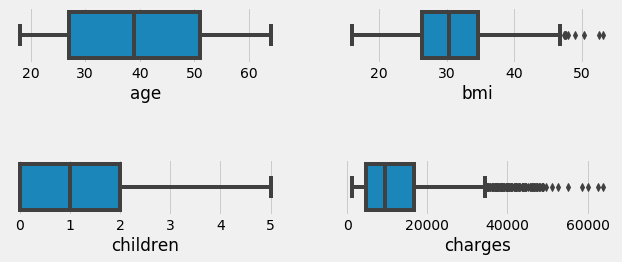

In [181]:
fig, axs = plt.subplots(figsize = (10,5),nrows = 2,ncols=2)
sns.boxplot(df['age'],ax=axs[0][0])
sns.boxplot(df['bmi'],ax=axs[0][1])
sns.boxplot(df['children'],ax=axs[1][0])
sns.boxplot(df['charges'],ax=axs[1][1])
fig.tight_layout(pad=4.0)

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

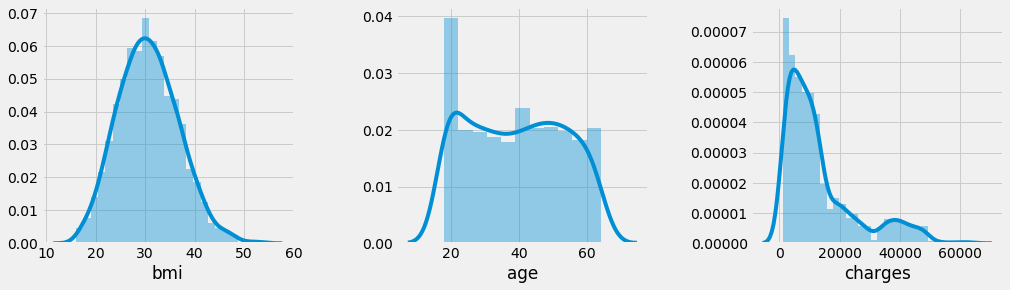

In [182]:
fig, axs = plt.subplots(figsize = (15,5),ncols = 3)
#fig.delaxes(axs[1,1])
sns.distplot(df['bmi'],ax=axs[0])
sns.distplot(df['age'],ax=axs[1])
sns.distplot(df['charges'],ax=axs[2])
fig.tight_layout(pad=3.0)

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

In [183]:
print('Skewness for bmi: {:3f}'.format(df['bmi'].skew()))
print('Skewness for Age: {:3f}'.format(df['age'].skew()))
print('Skewness for Charges: {:3f}'.format(df['charges'].skew()))

Skewness for bmi: 0.284047
Skewness for Age: 0.055673
Skewness for Charges: 1.515880


g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

In [184]:
age_outliers = df[np.abs(zscore(df['age']))>2.58]['age']
bmi_outliers = df[np.abs(zscore(df['bmi']))>2.58]['age']
charges_outliers = df[np.abs(zscore(df['charges']))>2.58]['age']

In [185]:
print('There are {} Outliers for age, values : {} '.format(age_outliers.size, age_outliers.values))
print('There are {} Outliers for bmi, values : {} '.format(bmi_outliers.size, bmi_outliers.values))
print('There are {} Outliers for charges, values : {} '.format(charges_outliers.size, charges_outliers.values))

There are 0 Outliers for age, values : [] 
There are 14 Outliers for bmi, values : [58 46 47 52 32 54 54 37 23 37 26 22 52 18] 
There are 40 Outliers for charges, values : [28 60 58 64 63 63 63 46 54 59 64 61 64 61 44 57 54 43 48 31 62 44 60 29
 33 60 37 51 60 51 59 51 53 60 52 52 64 61 45 62] 


h. Distribution of categorical columns (include children) (4 marks)

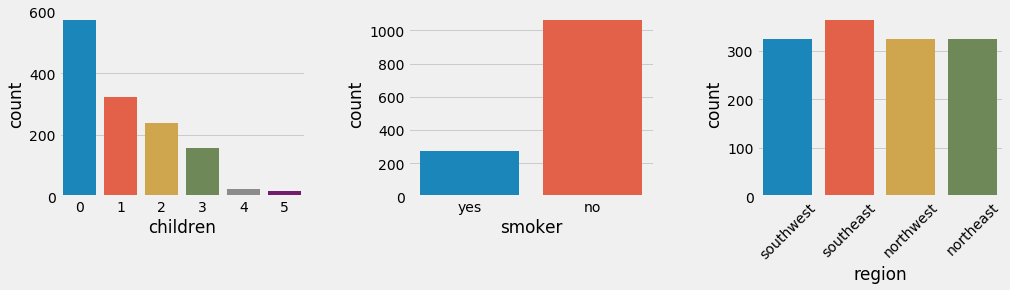

In [186]:
fig, axs = plt.subplots(figsize = (15,5),ncols = 3)
sns.countplot(df['children'],ax=axs[0])
sns.countplot(df['smoker'],ax=axs[1])
sns.countplot(df['region'],ax=axs[2])
plt.xticks(rotation=45)
fig.tight_layout(pad=3.0)

i. Pair plot that includes all the columns of the data frame (4 marks)

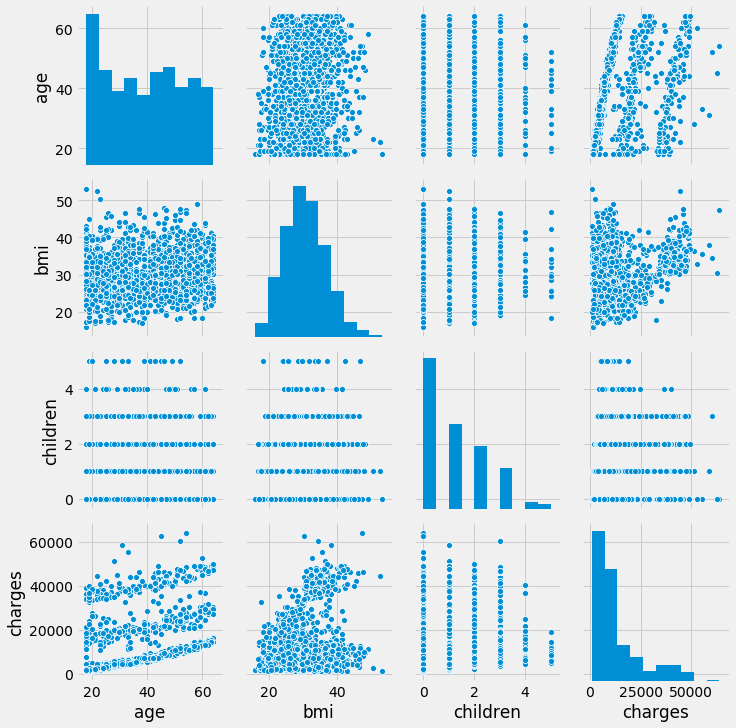

In [206]:
sns.pairplot(df);

Answer the following questions with statistical evidence (28 marks)

a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

In [188]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [189]:
from scipy.stats import ttest_ind

t_stat, p = ttest_ind(df[df['smoker'] == 'yes']['charges'],df[df['smoker'] == 'no']['charges'])
print(t_stat,p)

46.664921172723716 8.271435842177219e-283


Null Hypothesis: Means of charges are same for both smoker and non smoker

Alternate Hypothesis: Means of charges are different for smoker and non smoker

p-value < 0.01 indicates to reject null hypothesis. Hence there is a significant differnce in charges for smoker and non smokers. We can say this with 99 percent confidence level.

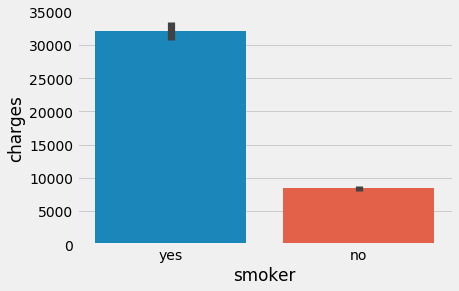

In [190]:
sns.barplot(df['smoker'],df['charges']);

b. Does bmi of males differ significantly from that of females? (7 marks)

In [191]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [192]:
from scipy.stats import ttest_ind

t_stat, p = ttest_ind(df[df['sex'] == 'female']['bmi'],df[df['sex'] == 'male']['bmi'])
print(t_stat,p)

-1.696752635752224 0.08997637178984932


Null Hypothesis: BMI means are same for both male and female

Alternate Hypothesis: BMI means are different for both male and female

 p-value > .05 indicates that we fail to reject null hypothesis. Hence there is no significant differnce in BMI means  for males and females.

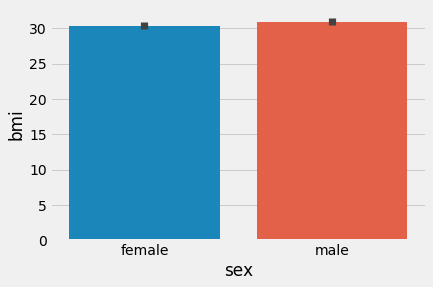

In [193]:
sns.barplot(df['sex'],df['bmi']);

c. Is the proportion of smokers significantly different in different genders? (7 marks)

In [194]:
smokers_male = df[df['sex'] == 'male']['smoker'].value_counts()[1]
smokers_female = df[df['sex'] == 'female']['smoker'].value_counts()[1]

In [195]:
n_male = df['sex'].value_counts()[0]
n_female = df['sex'].value_counts()[1]

In [196]:
from statsmodels.stats.proportion import proportions_ztest

stat, p = proportions_ztest([smokers_female,smokers_male],[n_female,n_male])
print(stat,p)

-2.7867402154855503 0.005324114164320532


Null hypothesis: Proportions of smokers are same in different genders.

Alternate Hypothesis: Proportions of smokers are same in different genders.

p < 0.05, we can reject null hypothesis. Hence, we can conclude that proportions of smokers are different in different genders.

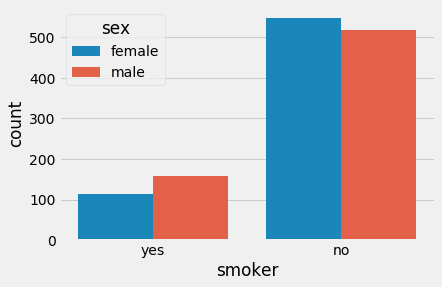

In [197]:
sns.countplot(df['smoker'],hue = df['sex']);

d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

First we will create a dataframe having rows with sex as female and children as [0,1,2]

 - Null Hypothesis: There is no significant difference in bmi index for female with 0,1 or 2 children.

 - Alternate Hypothesis: There is significant difference in bmi index for female with 0,1 or 2 children.

In [198]:
df_female = df[df['sex'] == 'female']

In [199]:
df_female = df_female[df_female['children'].isin([0,1,2])]

In [200]:
print(df_female['sex'].unique())
print(df_female['children'].unique())

['female']
[0 1 2]


In [201]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = df_female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


p > 0.05 hence we fail to reject null hypothesis. 

Hence there is no significant difference in bmi index for female with 0,1 or 2 children.

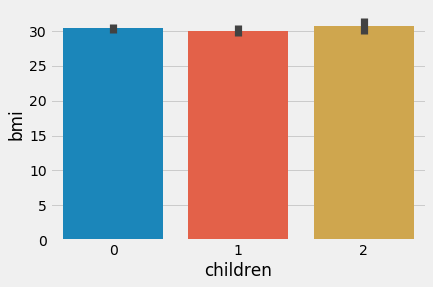

In [202]:
sns.barplot(df_female['children'],df_female['bmi']);